In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
from neurodsp.sim import sim_noisy_oscillator as sim_nosc

In [2]:
#simulate a gradually increasing time series
osc1 = sim_nosc(2, 500, 2,  noise_generator='ou_process')
osc2 = sim_nosc(2, 500, 5,  noise_generator='ou_process')
expf = (np.arange(0, 1000, 1)/300)**3
ts = osc1*2 + osc2*2 + expf

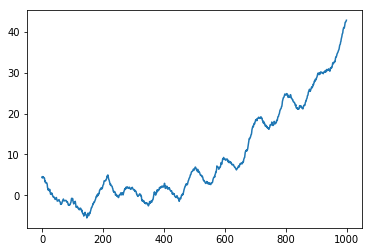

In [3]:
plt.plot(ts)

/home/allen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


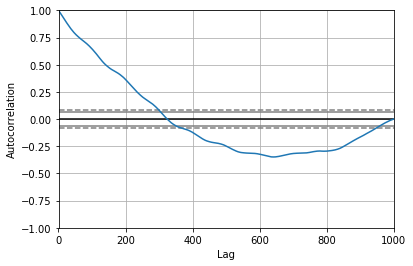

In [4]:
autocorrelation_plot(ts)

In [5]:
#fitting ARIMA
model = ARIMA(ts, order=np.array([5,1,0]))
model_fit = model.fit()
print(model_fit.summary())

/home/allen/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/allen/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/allen/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be i

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  999
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  28.331
Method:                       css-mle   S.D. of innovations              0.235
Date:                Mon, 20 May 2019   AIC                            -42.662
Time:                        11:23:37   BIC                             -8.314
Sample:                             1   HQIC                           -29.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0386      0.016      2.481      0.013       0.008       0.069
ar.L1.D.y      0.1201      0.032      3.807      0.000       0.058       0.182
ar.L2.D.y      0.1147      0.031      3.653      0.0

                0
count  999.000000
mean     0.000091
std      0.235328
min     -0.750940
25%     -0.149450
50%     -0.002541
75%      0.150786
max      0.624173


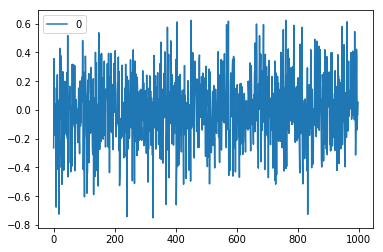

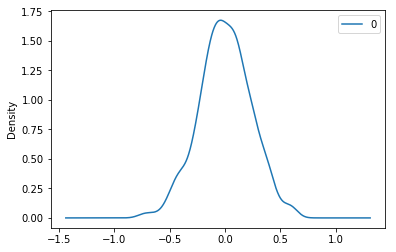

In [6]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

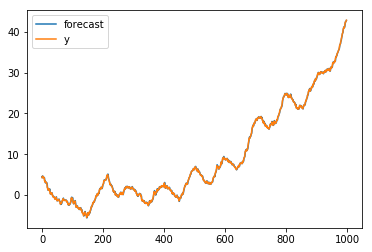

In [10]:
model_fit.plot_predict(dynamic=False)
plt.show()